In [10]:
import numpy as np
import pandas as pd

# Read input parameters
inputs = pd.read_csv('/home/serge/Desktop/data/data3d/inputs_trap_3d.csv')

# Read output data
def read_field_file(filename, shape=(150, 150, 150)):
    data = []
    with open(filename) as f:
        for line in f:
            arr = np.array([float(x) for x in line.strip().split(',')])
            data.append(arr.reshape(shape))
    return np.array(data)

potential_fields = read_field_file('/home/serge/Desktop/data/data3d/outputs_trap_p_3d.csv')
pseudo_potential_fields = read_field_file('/home/serge/Desktop/data/data3d/outputs_trap_pp_3d.csv')

# Example: Access first sample
sample_idx = 0
print("Input parameters:", inputs.iloc[sample_idx])
print("Potential field shape:", potential_fields[sample_idx].shape)

Input parameters: pos0        0.000292
pos1        0.000534
pos2        0.000514
pos3        0.000163
pos4        0.000255
volt0      71.329300
volt1     100.264000
volt2     103.906000
volt3      54.895000
volt4      59.757900
width0      0.000000
width1      0.000160
width2      0.000040
width3      0.000400
width4      0.000000
Name: nan, dtype: float64
Potential field shape: (150, 150, 150)


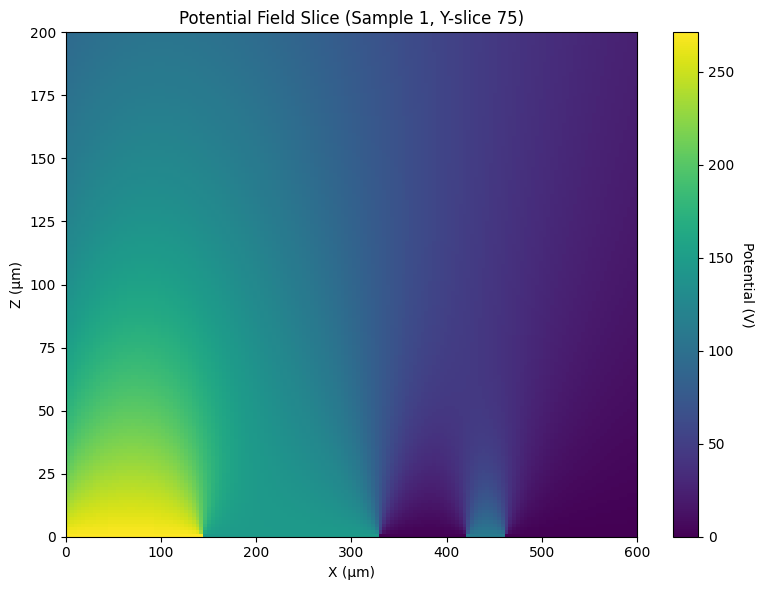

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_slice(fields, sample_idx=0, axis='z', slice_idx=None, 
                  lx=600e-6, ly=10000e-6, lz=200e-6, cmap='viridis'):
    # Get the 3D field for the selected sample
    field_3d = fields[sample_idx]
    
    # Set default slice to middle if not specified
    if slice_idx is None:
        slice_idx = field_3d.shape[{'x':0, 'y':1, 'z':2}[axis]] // 2
    
    # Extract 2D slice
    if axis == 'x':
        slice_2d = field_3d[slice_idx, :, :]
        extent = [0, ly*1e6, 0, lz*1e6]  # Convert to micrometers
        xlabel = 'Y (μm)'
        ylabel = 'Z (μm)'
    elif axis == 'y':
        slice_2d = field_3d[:, slice_idx, :]
        extent = [0, lx*1e6, 0, lz*1e6]
        xlabel = 'X (μm)'
        ylabel = 'Z (μm)'
    elif axis == 'z':
        slice_2d = field_3d[:, :, slice_idx]
        extent = [0, lx*1e6, 0, ly*1e6]
        xlabel = 'X (μm)'
        ylabel = 'Y (μm)'
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'")

    # Create plot
    plt.figure(figsize=(8, 6))
    im = plt.imshow(slice_2d.T,  # Transpose for correct orientation
                    extent=extent,
                    origin='lower',
                    cmap=cmap,
                    aspect='auto')
    
    plt.title(f'Potential Field Slice (Sample {sample_idx}, {axis.upper()}-slice {slice_idx})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Potential (V)', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# First load your data using the read_field_file function
potential_fields = read_field_file('/home/serge/Desktop/data/data3d/outputs_trap_p_3d.csv')
# Plot the 5th sample's X-Y slice (Z-slice) at middle Z position
#plot_2d_slice(potential_fields, sample_idx=2, axis='x', slice_idx=75)

# Plot the 0th sample's X-Z slice (Y-slice) at position 75
plot_2d_slice(potential_fields, sample_idx=1, axis='y', slice_idx=75)